In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dir = "/content/drive/MyDrive/Nazmus_Sakib/test"

In [4]:
image_types = []

In [5]:
for i in os.listdir(train_dir):
    image_types.append(i)

In [6]:
print("Types of images in dataset: ")
print(image_types)

Types of images in dataset: 
['ship', 'truck', 'deer', 'horse', 'dog', 'automobile', 'cat', 'frog', 'bird', 'airplane']


In [7]:
train_data = []

In [8]:
for i in image_types:
    train_path = os.path.join(train_dir, i)
    class_type = i
    for image in tqdm(os.listdir(train_path)):
        train_data_arr = cv2.imread(os.path.join(train_path, image))
        grayscale_image_arr = cv2.cvtColor(train_data_arr, cv2.COLOR_BGR2GRAY)
        train_data.append([grayscale_image_arr, class_type])

100%|██████████| 1000/1000 [00:14<00:00, 71.15it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


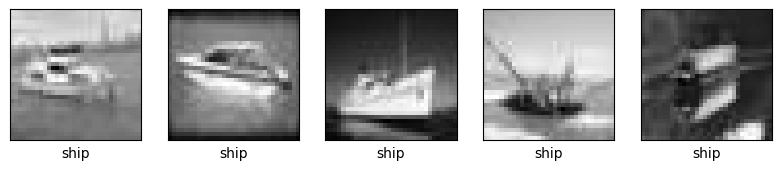

In [9]:
plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(2,10,i+1)
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}")
plt.show()

In [10]:
random.shuffle(train_data)

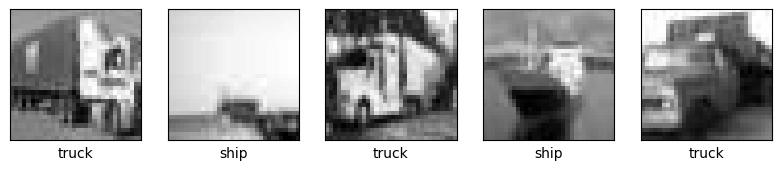

In [11]:
plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(2,10,i+1)
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}")
plt.show()

In [12]:
f0 = train_data[0:1000]
f1 = train_data[1000:2000]
f2 = train_data[2000:3000]
f3 = train_data[3000:4000]
f4 = train_data[4000:5000]

Fold 0 K = 1 Manhattan (L1) Accuracy: 0.501
Fold 0 K = 1 Euclidean (L2) Accuracy: 0.573
Fold 1 K = 1 Manhattan (L1) Accuracy: 0.5302713987473904
Fold 1 K = 1 Euclidean (L2) Accuracy: 0.5845511482254697
Fold 2 K = 1 Manhattan (L1) Accuracy: 0.0
Fold 2 K = 1 Euclidean (L2) Accuracy: 0.0
Fold 3 K = 1 Manhattan (L1) Accuracy: 0.0
Fold 3 K = 1 Euclidean (L2) Accuracy: 0.0
Fold 4 K = 1 Manhattan (L1) Accuracy: 0.0
Fold 4 K = 1 Euclidean (L2) Accuracy: 0.0
Fold 0 K = 2 Manhattan (L1) Accuracy: 0.386
Fold 0 K = 2 Euclidean (L2) Accuracy: 0.449
Fold 1 K = 2 Manhattan (L1) Accuracy: 0.4551148225469729
Fold 1 K = 2 Euclidean (L2) Accuracy: 0.5281837160751566
Fold 2 K = 2 Manhattan (L1) Accuracy: 0.0
Fold 2 K = 2 Euclidean (L2) Accuracy: 0.0
Fold 3 K = 2 Manhattan (L1) Accuracy: 0.0
Fold 3 K = 2 Euclidean (L2) Accuracy: 0.0
Fold 4 K = 2 Manhattan (L1) Accuracy: 0.0
Fold 4 K = 2 Euclidean (L2) Accuracy: 0.0
Fold 0 K = 3 Manhattan (L1) Accuracy: 0.497
Fold 0 K = 3 Euclidean (L2) Accuracy: 0.605
Fold

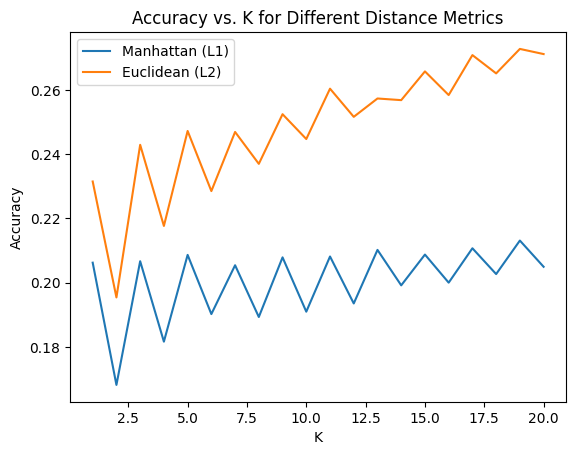

In [15]:
import numpy as np
import matplotlib.pyplot as plt

k_values = range(1, 21)
accuracies_l1 = []
accuracies_l2 = []
top_predictions_l1 = []
top_predictions_l2 = []

for k in k_values:
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    fold_predictions_l1 = []
    fold_predictions_l2 = []

    for i in range(5):
        if i == 0:
            train = f1 + f2 + f3 + f4
            validation = f0
        elif i == 1:
            train = f0 + f2 + f3 + f4
            validation = f1
        elif i == 2:
            train = f1 + f0 + f3 + f4
            validation = f2
        elif i == 3:
            train = f1 + f2 + f0 + f4
            validation = f3
        elif i == 4:
            train = f1 + f2 + f3 + f0
            validation = f4

        correct_l1 = 0
        correct_l2 = 0
        total = 0
        predictions_l1 = []
        predictions_l2 = []

        for v in validation:
            distances_l1 = []
            distances_l2 = []

            for t in train:
                l1_dist = np.sum(np.abs(t[0] - v[0]))
                l2_dist = np.sqrt(np.sum((t[0] - v[0]) ** 2))
                distances_l1.append((l1_dist, t[1]))
                distances_l2.append((l2_dist, t[1]))

            distances_l1.sort()
            distances_l2.sort()

            neighbors_l1 = [dist[1] for dist in distances_l1[:k]]
            neighbors_l2 = [dist[1] for dist in distances_l2[:k]]

            prediction_l1 = max(set(neighbors_l1), key=neighbors_l1.count)
            prediction_l2 = max(set(neighbors_l2), key=neighbors_l2.count)

            if prediction_l1 == v[1]:
                correct_l1 += 1
            if prediction_l2 == v[1]:
                correct_l2 += 1

            total += 1

            top_k_predictions_l1 = [dist[1] for dist in distances_l1[:5]]
            top_k_predictions_l2 = [dist[1] for dist in distances_l2[:5]]
            predictions_l1.append(top_k_predictions_l1)
            predictions_l2.append(top_k_predictions_l2)

        if total == 0:
            # Handle the case where no validation samples were processed
            accuracy_l1 = 0.0
            accuracy_l2 = 0.0
        else:
            accuracy_l1 = correct_l1 / total
            accuracy_l2 = correct_l2 / total

        fold_accuracies_l1.append(accuracy_l1)
        fold_accuracies_l2.append(accuracy_l2)
        fold_predictions_l1.append(predictions_l1)
        fold_predictions_l2.append(predictions_l2)

        print("Fold", i, "K =", k, "Manhattan (L1) Accuracy:", accuracy_l1)
        print("Fold", i, "K =", k, "Euclidean (L2) Accuracy:", accuracy_l2)

    accuracies_l1.append(fold_accuracies_l1)
    accuracies_l2.append(fold_accuracies_l2)
    top_predictions_l1.append(fold_predictions_l1)
    top_predictions_l2.append(fold_predictions_l2)

accuracies_l1 = np.array(accuracies_l1)
accuracies_l2 = np.array(accuracies_l2)

avg_accuracies_l1 = np.mean(accuracies_l1, axis=1)
avg_accuracies_l2 = np.mean(accuracies_l2, axis=1)

plt.plot(k_values, avg_accuracies_l1, label="Manhattan (L1)")
plt.plot(k_values, avg_accuracies_l2, label="Euclidean (L2)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for Different Distance Metrics")
plt.legend()
plt.show()

fold_index = 0
validation_index = 0
top_5_predictions_l1 = top_predictions_l1[fold_index][validation_index]
top_5_predictions_l2 = top_predictions_l2[fold_index][validation_index]


In [16]:
print("Top 5 Predictions (Manhattan - L1):")
for i, prediction in enumerate(top_5_predictions_l1[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

print("Top 5 Predictions (Euclidean - L2):")
for i, prediction in enumerate(top_5_predictions_l2[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

Top 5 Predictions (Manhattan - L1):
Prediction 1: Class ['truck', 'ship', 'truck', 'truck', 'ship']
Prediction 2: Class ['ship', 'ship', 'ship', 'ship', 'ship']
Prediction 3: Class ['ship', 'ship', 'ship', 'truck', 'ship']
Prediction 4: Class ['ship', 'ship', 'ship', 'ship', 'ship']
Prediction 5: Class ['truck', 'ship', 'ship', 'truck', 'ship']
Top 5 Predictions (Euclidean - L2):
Prediction 1: Class ['ship', 'ship', 'ship', 'truck', 'truck']
Prediction 2: Class ['ship', 'ship', 'ship', 'truck', 'ship']
Prediction 3: Class ['truck', 'truck', 'truck', 'ship', 'ship']
Prediction 4: Class ['truck', 'ship', 'truck', 'ship', 'truck']
Prediction 5: Class ['truck', 'truck', 'truck', 'truck', 'truck']
